# QOSF Screening Task 2 - Samantha Buck (NuQlear Group)

In [3]:
import random 
import cirq
import qutip
import numpy as np
from cirq.circuits import InsertStrategy

from cirq.contrib.svg import circuit_to_svg
from IPython.display import SVG, display
import os

In [4]:
#Defining a function to print/output circuits in a clean way. 
def cprint(circuit):
  """Convert the cirq.Circuit to a temp svg and display + garbage collect."""
  with open("temp.svg", 'w+') as f:
    f.write(circuit_to_svg(circuit))
  display(SVG('temp.svg'))
  os.remove('temp.svg')

Explicitly expressed gates that are relevant for creating the desired quantum error correcting code:

In [6]:
#For each of these gates, calling cirq.unitary on the gate will tell you how it acts on the computational basis.

print('CNOT =') #CNOT Gate
print(cirq.unitary(cirq.CNOT))

print('\nH =') # Hadamard Gate
print(cirq.unitary(cirq.H))

print('\nToffoli =') #Toffoli Gate
print(cirq.unitary(cirq.TOFFOLI))

CNOT =
[[1.+0.j 0.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 1.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 0.+0.j 1.+0.j]
 [0.+0.j 0.+0.j 1.+0.j 0.+0.j]]

H =
[[ 0.70710678+0.j  0.70710678+0.j]
 [ 0.70710678+0.j -0.70710678+0.j]]

Toffoli =
[[1.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 1.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 1.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 0.+0.j 1.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 0.+0.j 0.+0.j 1.+0.j 0.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 1.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 1.+0.j]
 [0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 1.+0.j 0.+0.j]]


In the following cell we define the qubits to be used in the construction of our error correcting code

In [100]:
# to verify that entagnlement was generated between the qubits, let us re-print the circuit and then apply a bell measurement and see if we get the expected outcome:
#Remember in Cirq, simulators make a distinction between a “run” and a “simulation”
#Remember, after creating the circuit and a simulator, we can "run" a simulation of the circuit and thereby simulate an actual measurement outcome. If we don't simulate the circuit we will be using "run", which will mimic the actual quantum hardware

# Define our two qubits and some operations (the entanglement operation in this case, and H gate and a CNOT gate)
q0 = cirq.NamedQubit("Q1")
q1 = cirq.NamedQubit("Q2")
r1 = cirq.NamedQubit("Redundancy qubit 1")
r2 = cirq.NamedQubit("Redundancy qubit 2")
r3 = cirq.NamedQubit("Redundancy qubit 3")
r4 = cirq.NamedQubit("Redundancy qubit 4")
a1 = cirq.NamedQubit("Ancilla1")
a2 = cirq.NamedQubit("Ancilla2")
a3 = cirq.NamedQubit("Ancilla3")
a4 = cirq.NamedQubit("Ancilla4")



# Q2 Part 1

 Part 1 of question 3 asks us to build a simple circuit to prepare the Bell state, which will be carried out in the next cell.

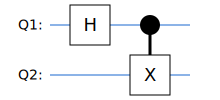

In [8]:
# Define our entangelement circuit
ops = [cirq.H(q0), cirq.CNOT(q0, q1)]
circuit = cirq.Circuit(*ops)
cprint(circuit)


to test and see if we get what we should expect from this simple ciruit, let's run a simulation and measure it's outcome:

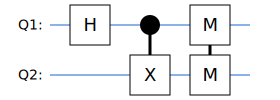


Measurement results:  Q1,Q2=10111000, 10111000


In [9]:
# Define our entangelement circuit
ops = [cirq.H(q0), cirq.CNOT(q0, q1), cirq.measure(q0,q1)]
circuit = cirq.Circuit(*ops)
cprint(circuit)

# Define a simulator
simulator = cirq.Simulator()

# Run a simulation and print the measurement results:
result = simulator.run(circuit, repetitions=8)
print('\nMeasurement results: ',result)


The following cell will run the circuit agian, with a more clearly defined explanation of what these results mean, and if they are indeed in line with what we would expect to obtain. 

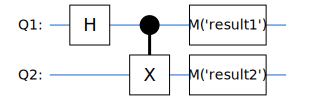

Q1 measurement result: Counter({1: 50, 0: 50})
Q2 measurement result: Counter({1: 50, 0: 50})


In [10]:
#qubit = cirq.NamedQubit("myqubit")
q0 = cirq.NamedQubit("Q1")
q1 = cirq.NamedQubit("Q2")
ops = [cirq.H(q0), cirq.CNOT(q0, q1)]
circuit = cirq.Circuit(*ops)
circuit.append(cirq.measure(q0, key='result1'))
circuit.append(cirq.measure(q1, key='result2'))
cprint(circuit)
s=cirq.Simulator()
samples=s.run(circuit, repetitions=100)
print('Q1 measurement result:' ,samples.histogram(key='result1'))
print('Q2 measurement result:' ,samples.histogram(key='result2'))

The Hadamard gate is the gate that generates superposition by acting on a single qubit, and can be represented by a 2 x 2 matrix:

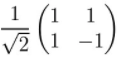

We want to find out what happens when we apply this gate on a qubit that is in the |0> state. This can be inspected by multiplying the gate matrix to the qubit vector:

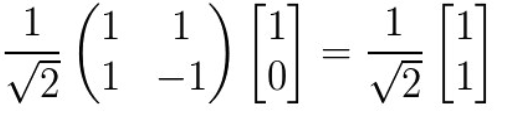

This equation shows that, after applying the Hadamard Gate to a qubit that is in the |0> state, the qubit enters a new state where the probability of measuring 0 is:

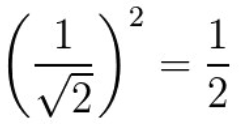

as is the probability of measuring 1.

From here, to construct our bell state , the inputs A (control) and B (target) to the CNOT gate are:

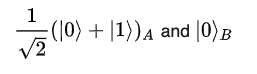

After applying CNOT, the resulting Bell State will look like:

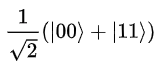

and possess the property that the individual qubits can be measured using any basis and will always present a 50/50 chance of resolving to each state. In effect, the individual qubits are in an undefined state. The correlation between the two qubits is the complete description of the state of the two qubits; if we both choose the same basis to measure both qubits and compare notes, the measurements will perfectly correlate.

Therefore, we should expect to get an output of obtaining each one of the two states, 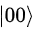 and , 50 % of the time.

After running this simple circuit, we can confirm that this is indeed the case. 

# Q2 Part 2

Introduction of Errors in the Circuit: 

The next part of this screening task is to add, right before the CNOT gate and for each of the two qubits, an arbitrary “error gate”. Error gate means that with a certain probability (that we can decide but must be non-zero for all the choices) we'll have a 1 qubit unitary which can be either the identity, or the X gate (bit-flip error) or the Z gate (sign-flip error).


The following three cells provide different methods of manually characterizing bit and phase flip errors in the circuit. The first two cells provide manual constructions of the errors which we desire to implement, while the third cell leverages Cirq's built in cirq.BitFlipChannel and cirq.PhaseFlipChannel functionalities in order to implement the desired errors in a more streamlined manner. The method provided in the third cell is what will be used in the final error correcting code model generated for the screening question. 

Cell 1:

In [18]:
#Set the value of b as the probability that an bit-flip error will NOT occur
b=0.5
arbitrary_bitflip_error_gate = cirq.LinearCombinationOfGates({cirq.I: b**0.5, cirq.X: (1-b)**0.5})
print(arbitrary_bitflip_error_gate)

#Set the value of p as the probability that an phase-flip error will NOT occur
                                                              
#NOTE: The hadamard gates applied to the second qubit and the 2 corresponding ancilla qubits in the phase flip ecc cause a change of basis 
#to the hadarmard basis for these qubits, which in turn causes a phase flip to be represented by an X gate, where it would usually be
#represented by a Z gate in the regular (untransformed) computational basis of the qubits.     
p=1
arbitrary_phaseflip_error_gate = cirq.LinearCombinationOfGates({cirq.I: p**0.5 , cirq.X: (1-p)**0.5})
print(arbitrary_phaseflip_error_gate)

0.707*I+0.707*X
1.000*I


Cell 2:

In [19]:
#Set the value of b as the probability that an bit-flip error will NOT occur

b=0
Error1= b**0.5*cirq.I(q0)+(1-b)**0.5*cirq.X(q0)

#Set the value of p as the probability that an phase-flip error will NOT occur
                                                              
#NOTE: The hadamard gates applied to the second qubit and the 2 corresponding ancilla qubits in the phase flip ecc cause a change of basis 
#to the hadarmard basis for these qubits, which in turn causes a phase flip to be represented by an X gate, where it would usually be
#represented by a Z gate in the regular (untransformed) computational basis of the qubits. 

p=0
Error2= p**0.5*cirq.I(q1)+(1-p)**0.5*cirq.X(q1)

Cell 3:

In [52]:
E1= cirq.BitFlipChannel(0).on(q0)
E2= cirq.PhaseFlipChannel(0.7).on(q1)

Below is a small toy circuit used to demonstrate the behaviour of the bit flip and phase flip cirq functionalies *before* we implement them in our error correcting code.

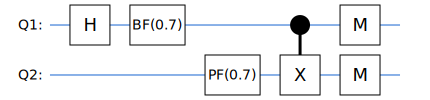


Measurement results:  measurements: Q1=0 Q2=0
output vector: |00⟩

Moments in the circuit:

Moment 0: H(Q1)
Moment 1: bit_flip(p=0.7)(Q1)
Moment 2: phase_flip(p=0.7)(Q2)
Moment 3: CNOT(Q1, Q2)
Moment 4: cirq.MeasurementGate(1, 'Q1', ())(Q1) and cirq.MeasurementGate(1, 'Q2', ())(Q2)


In [206]:
#circuit= cirq.Circuit((moment1, moment2, moment3, moment4, moment5, moment6, moment7)) 
circuit= cirq.Circuit((moment1, moment18, moment19, moment4, moment7))
cprint(circuit)

# Define a simulator
simulator = cirq.Simulator()

# Run a simulation and print the measurement results:
#result = simulator.run(circuit)
result = simulator.simulate(circuit)
print('\nMeasurement results: ',result)

print("\nMoments in the circuit:\n")
for i, moment in enumerate(circuit):
    print('Moment {}: {}'.format(i, moment))

# Q2 Part 3

# Bit Flip and Phase Flip Error Correction Codes


Theory:

Quantum error correction is a set of methods to protect quantum information where the information is stored in a quantum error-correcting code, which is a subspace in a larger Hilbert space. This code is designed so that the most common errors move the state into an error space orthogonal to the original code space while preserving the information in the state. It is possible to determine whether an error has occurred by a suitable measurement and to apply a unitary correction that returns the state to the code space without measuring (and hence disturbing) the protected state itself. In general, codewords of a quantum code are entangled states. No code that stores information can protect against all possible errors; instead, codes are designed to correct a specific error set, which should be chosen to match the most likely types of noise. An error set is represented by a set of operators that can multiply the codeword state.

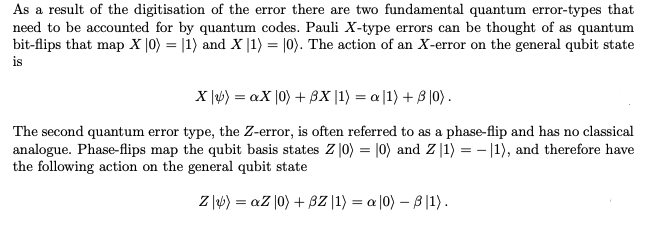

How are we able to correct errors using this code without directly measuring or obtaining information about the logical state? Two additional ancilla qubits are introduced, which are used to extract syndrome information (information regarding possible errors) from the data block without discriminating the exact state of any
qubit. The encoding and correction circuit is illustrated. Correction proceeds by introducing two ancilla qubits and performing a sequence of CNOT gates, which checks the parity of the three qubit data block.

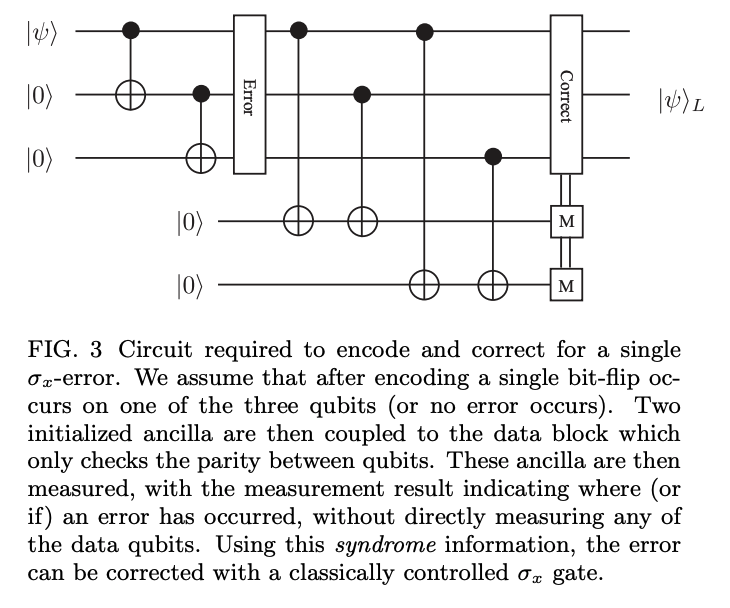


source: https://arxiv.org/pdf/0905.2794.pdf

My measuring the ancilla qubits, we can discern on which of the three carriers the bit flip occurred, and we can correct for it using the following table:

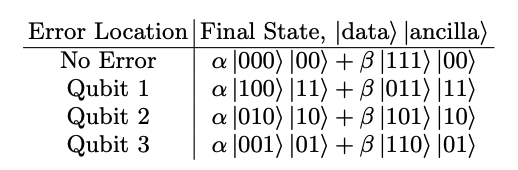

*The subsequent two cells following the first cell (containing the full circuit) isolate the  error correcting code implemented on the first qubit (pertaining to the bit flip code) and on the second qubit (pertaining to the phase flip code), respectively. A brief description of each individual type of ecc will be provided with the corresponding cell.*

# Bit Flip Error Correction:


Bit Flip Error Correction:
    
   The following chunk of code isolates the bit flip error correction portion of the above ciruit with the intention of showcasing which specific operations pertain to a successful (general) bit flip error correcting code.
   
In general, quantum error correction is complicated by the no-cloning theorem, wavefunction collapse and the existence of a "uniquely quantum" error-type known as the the phase-flip (which will be discussed below in a subsequent cell).  Classical repetition codes work by increasing the resources used to encode the data beyond the theoretical minimum, and this idea is employed, analogously, in quantum codes via the introduction of redundancy (rather than repetition), which is added by expanding the Hilbert space in which the qubits are encoded.

The effect of the encoding operation is to distribute the quantum information in the initial state |ψ> across the entangled two-party logical state |ψ>L . This introduces the "redundancy" to the encoding, which can be exploited for error detection. 
    
The redundancy offers its error correction mechanism as follows:

Since measuring the value of individual qubits obviously won’t work (as this would destroy the quantum state which we are trying to preserve), measuring whether or not two qubits are the same or different in the standard basis provides away of extracting information about where the error has occurred, *without* disturbing the quantum information.

If a bit flip error has in fact ooccured, the correction operations can be carried out fairly simply using Toffoli gates.


*Note: The bit flip error correcting code generated in this notebook was modeled after the graphically depicted circuit provided in the link offered in the "Screening Task" Google document, which will be provided below*

https://en.wikipedia.org/wiki/Quantum_error_correction#:~:text=A%20quantum%20error%20correcting%20code%20protects%20quantum,errors%20of%20a%20limited%20form.&text=In%20most%20codes%2C%20the%20effect,%2C%20Z%2C%20and%20Y).

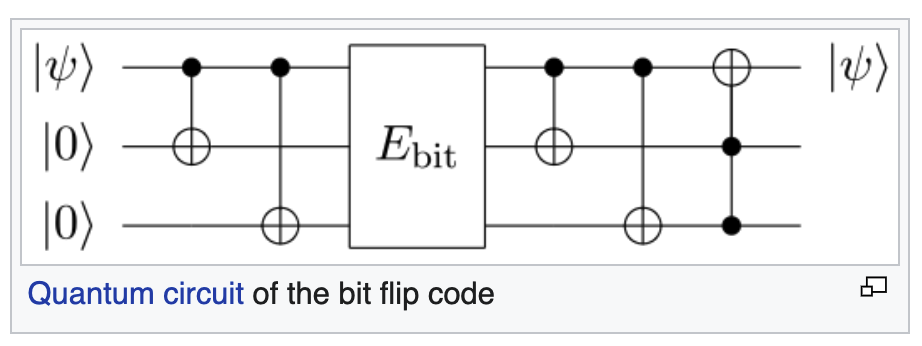

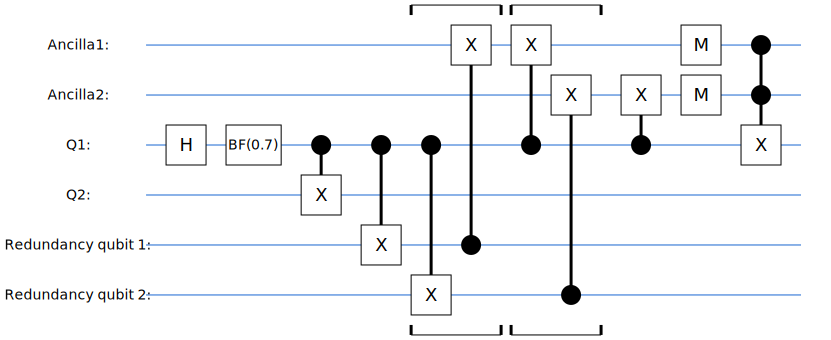


Measurement results:  measurements: Ancilla1=0 Ancilla2=0
output vector: 0.707|000000⟩ + 0.707|001111⟩


In [157]:
circuit= cirq.Circuit((moment1, moment18, moment4, cirq.CNOT(q0,r1), cirq.CNOT(q0,r2), cirq.CNOT(r1,a1), moment2, cirq.CNOT(r2,a2), moment5, moment9, moment8))
                       
                       #cirq.CNOT(q1,r3), cirq.CNOT(q1,r4), moment10, 
                       #moment11, moment12, moment13, moment14, moment15, moment16, moment17,
                       #moment7))

cprint(circuit)

# Define a simulator
simulator = cirq.Simulator()

# Run a simulation and print the measurement results:
#result = simulator.run(circuit)
result = simulator.simulate(circuit)
print('\nMeasurement results: ',result)

# Phase Flip Error Correction:

Phase Flip Error Correction:
    
   The following chunk of code isolates the phase flip error correction sub-circuit portion of the above (total) ciruit with the intention of showcasing which specific operations pertain to a successful (general) phase flip error correcting code.
   
   
So far we've discussed bit flip errors, however, this is not the only sort of error that could have occurred. The channel might have left the identity of the 0 and 1 alone, but altered their relative phase, introducing a relative factor of −1 when the first qubit is |1>. 

For instance, a qubit in the state 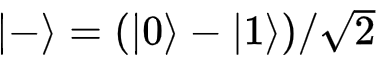

may have its sign flip to

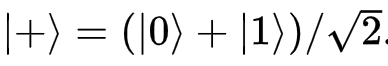


*Note: The phase flip error correcting code generated in this notebook was modeled after the graphically depicted circuit provided in the link offered in the "Screening Task" Google document, which will be provided below*

https://en.wikipedia.org/wiki/Quantum_error_correction#:~:text=A%20quantum%20error%20correcting%20code%20protects%20quantum,errors%20of%20a%20limited%20form.&text=In%20most%20codes%2C%20the%20effect,%2C%20Z%2C%20and%20Y).

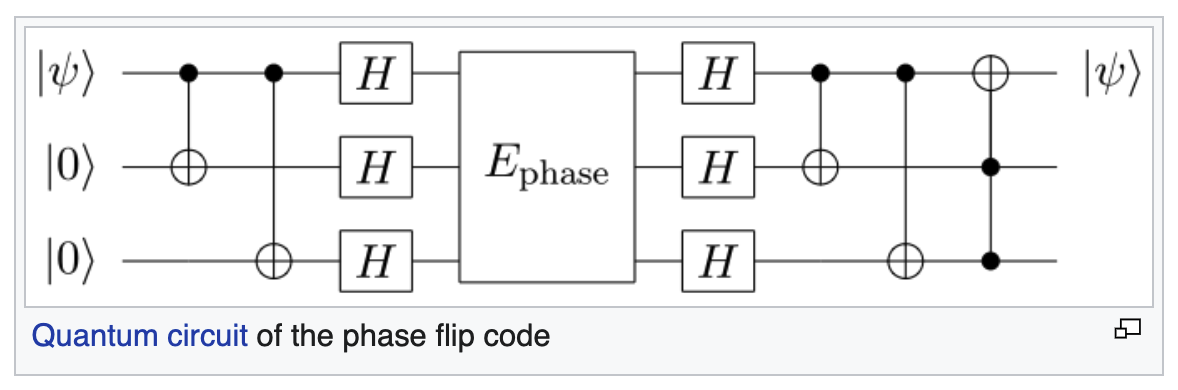

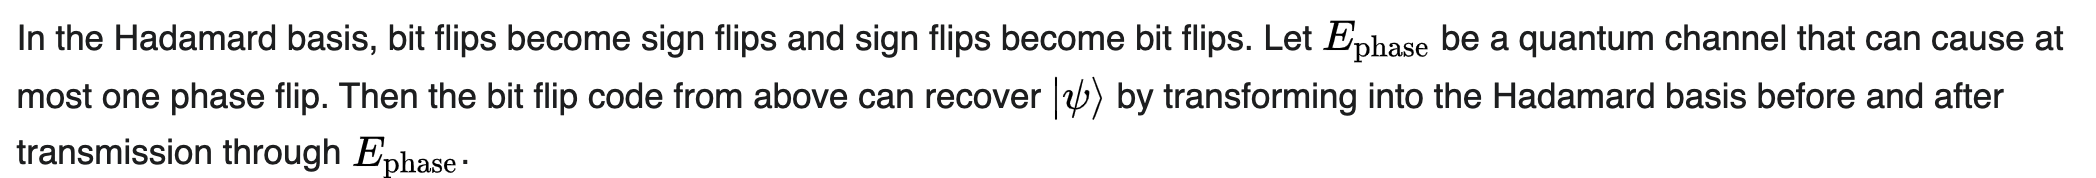

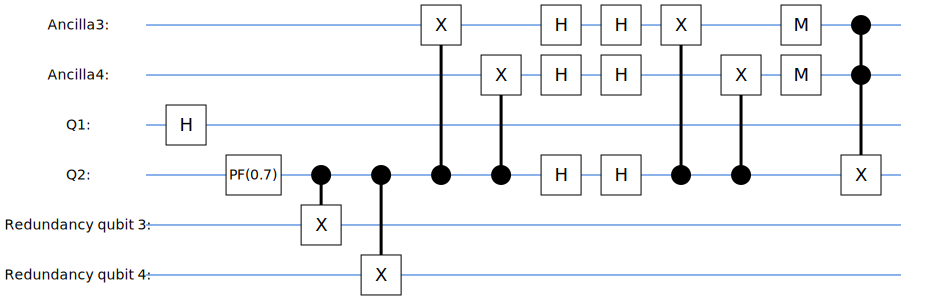


Measurement results:  measurements: Ancilla3=0 Ancilla4=0
output vector: 0.707|000000⟩ + 0.707|001000⟩


In [180]:
circuit= cirq.Circuit((moment1, moment19, cirq.CNOT(q1,r3), cirq.CNOT(q1,r4), moment10, 
                       moment11, moment12, moment13, moment14,moment15, moment17, moment16))
cprint(circuit)

# Define a simulator
simulator = cirq.Simulator()

# Run a simulation and print the measurement results:
#result = simulator.run(circuit)
result = simulator.simulate(circuit)
print('\nMeasurement results: ',result)

The following two cells define the operations (gates) and the cirq "moments" that will be called in order to construct our error correcting codes (both bit and phase flip) on each of the two qubits in our circuit:

In [109]:
#all gates applied to ciruit 

X1= cirq.X(q0)
Z1= cirq.Z(q1)

CXR1 = cirq.CNOT(q0,r1)
CXR2 = cirq.CNOT(q0,r2)
CXR3 = cirq.CNOT(q1,r3)
CXR4 = cirq.CNOT(q1,r4)

CX_RA1 = cirq.CNOT(q1,r3)
CX_RA2 = cirq.CNOT(q1,r4)

H1 = cirq.H(q0)
H2 = cirq.H(q1)
H3 = cirq.H(a3)
H4 = cirq.H(a4)

Toffoli = cirq.TOFFOLI(a1, a2, q0)
Toffoli2 = cirq.TOFFOLI(a3, a4, q1)

CX1= cirq.CNOT(q0, q1)
CX2= cirq.CNOT(q0, a1)
CX3= cirq.CNOT(r1, a2)

CX4= cirq.CNOT(q0, a2)
CX5= cirq.CNOT(q0, a2)

CX6= cirq.CNOT(q1, a3)
CX7= cirq.CNOT(q1, a4)

CX8= cirq.CNOT(q1, a3)
CX9= cirq.CNOT(q1, a4)

M1= cirq.measure(q0)
M2= cirq.measure(q1)

#Measure ancilla qubits for bit-flip ecc:
M3= cirq.measure(a1)
M4= cirq.measure(a2)

#Measure ancilla qubits for phase-flip ecc:
M5= cirq.measure(a3)
M6= cirq.measure(a4)

E1= cirq.BitFlipChannel(0.7).on(q0)
E2= cirq.PhaseFlipChannel(0.7).on(q1)

In [110]:
# moments implemented to create our desired cirucit(s):

#Intialize circuit with Hadamard gate on qubit 1, and then introduce the bit and phase flip errors on qubits 1 and 2 (respectively) before the CNOT gate

moment1 = cirq.Moment([H1])

moment18 = cirq.Moment([E1])#introduce first error on Q1
moment19 = cirq.Moment([E2])#introduce second error on Q2 



#########Implement Bit-flip error correcting code :

moment2 = cirq.Moment([CX2]) #CNOT q1-A1
moment3 = cirq.Moment([CX3]) #CNOT q1-A2

moment21 = cirq.Moment([Z1]) #syndrome gate

moment5 = cirq.Moment([CX4]) #CNOT q1-A1
moment6 = cirq.Moment([CX5])  #CNOT q1-A2


moment8 = cirq.Moment([Toffoli]) #Toffoli gate from a1 and a2 ancilla qubits to q0   

moment9 = cirq.Moment([M3,M4]) #bit flip ecc ancilla qubit measurements



#########Implement phase-flip error correcting code:

moment10 = cirq.Moment([CX6]) #CNOT q2-A3
moment11 = cirq.Moment([CX7]) #CNOT q2-A4

moment12= cirq.Moment([H2, H3, H4])
moment20 = cirq.Moment([X1])        #syndrome gate
moment13= cirq.Moment([H2, H3, H4])

moment14 = cirq.Moment([CX8]) #CNOT q2-A3
moment15 = cirq.Moment([CX9]) #CNOT q2-A4

moment16 = cirq.Moment([Toffoli2]) #Toffoli gate from a3 and a4 ancilla qubits to q1 

moment17 = cirq.Moment([M5,M6]) #phase flip ecc ancilla qubit measurements



moment4 = cirq.Moment([CX1]) # encoding between original qubit 1 and qubit 2 
moment7 = cirq.Moment([M1,M2]) #final circuit measurement 

# Bit Flip and Phase Flip Error Correcting Code(s) on Both Qubits in Circuit

Concatinating these moments together in the desired order will constitute the construction of our "full" bit and phase flip error correcting circuits applied to each one of the qubits, respectively. 

*Note : The following cell assembles the all of the pre-defined cirq "moments" into a full circuit that includes an bit flip error correcting code on the first qubit, and a phase flip error correcting code on the second qubit.*

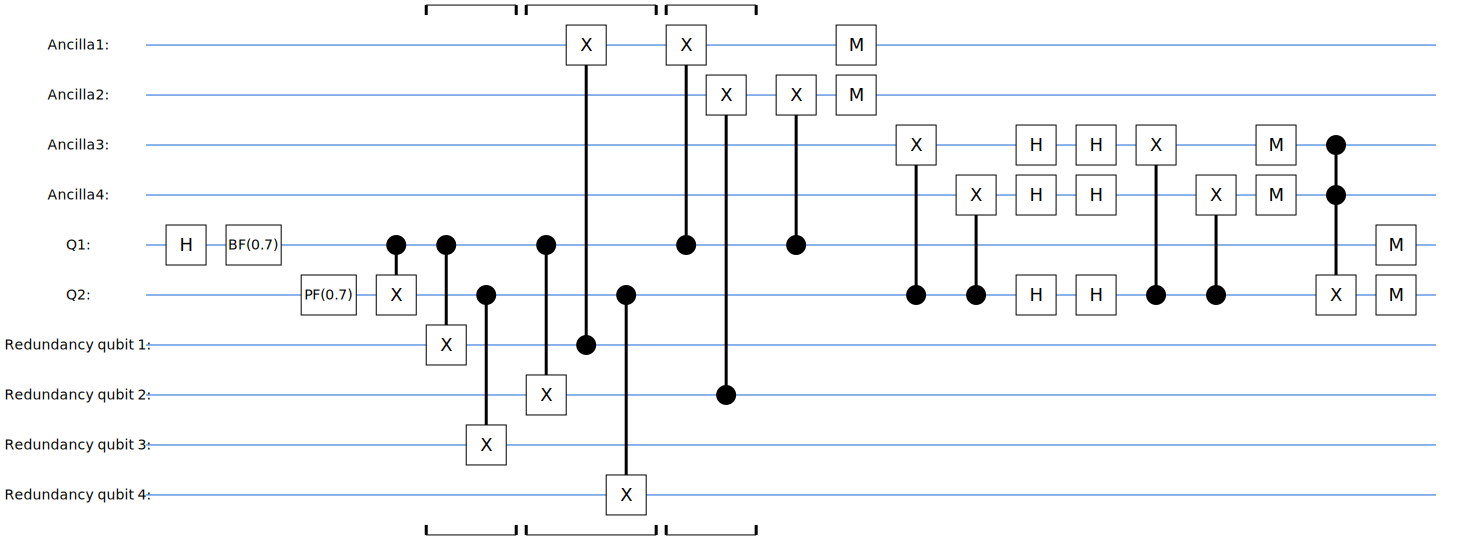


Measurement results:  measurements: Ancilla1=0 Ancilla2=0 Ancilla3=0 Ancilla4=0 Q1=0 Q2=0
output vector: |0000000000⟩


In [171]:
#circuit= cirq.Circuit((moment1, moment18, moment19, moment4, cirq.CNOT(q0,r1), cirq.CNOT(q0,r2), cirq.CNOT(r1,a1), moment2, moment3, moment5, moment6, moment8, moment9, moment10, 
                      # moment11, moment12, moment13, moment14, moment15, moment16, moment17,
                      # moment7))

circuit= cirq.Circuit((moment1, moment18, moment19, moment4, cirq.CNOT(q0,r1), cirq.CNOT(q0,r2), cirq.CNOT(r1,a1),moment2, cirq.CNOT(r2,a2), moment5, moment9,
                       cirq.CNOT(q1,r3), cirq.CNOT(q1,r4), moment10, 
                       moment11, moment12, moment13, moment14,moment15, moment17, moment16,
                       moment7))

cprint(circuit)

# Define a simulator
simulator = cirq.Simulator()

# Run a simulation and print the measurement results:
#result = simulator.run(circuit)
result = simulator.simulate(circuit)
print('\nMeasurement results: ',result)

# Q2 Part 4:

Interpreting Results

Test your solution by making many measurements over the final state and testing that the results are in line with the expectations.

Other Error Types:


In this notebook we have covered bit flip and phase flip errors and error corrections, however this does not exhaust the list of possible one qubit errors. For instance, we could have both a bit flip and a sign flip on the same qubit, which yields an error of the form:



However, by going through the processes described above, we chose to addressed the bit flip, then the sign flip (in fact, this code will correct a bit flip and a sign flip even if they are on different qubits). These two errors can be described as the operation of:

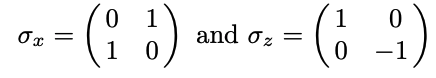



# References:

References used it the construction of this notebook :


https://en.wikipedia.org/wiki/Quantum_error_correction#:~:text=A%20quantum%20error%20correcting%20code%20protects%20quantum,errors%20of%20a%20limited%20form.&text=In%20most%20codes%2C%20the%20effect,%2C%20Z%2C%20and%20Y).

https://arxiv.org/pdf/0905.2794.pdf

https://arxiv.org/pdf/quant-ph/9705052.pdf

https://arxiv.org/pdf/1010.3242.pdf

